In [1]:
'''
【项目01】  电影数据处理及分析实战
项目要求
1数据清洗 
1.1去除空值 
1.2将时间字段改为时间标签

2好评率统计 
2.1分析出不同导演电影的好评率，并筛选出TOP20 
2.2通过多系列柱状图，做图表可视化

3每年评影人数统计 
3.1计算统计出2001-2016年每年评影人数总量 
3.2通过面积图，做图表可视化，分析每年人数总量变化规律 
3.3验证是否有异常值（极度异常） 
3.4创建函数分析出数据外限最大最小值 
3.5筛选查看异常值

'''

'\n【项目01】  电影数据处理及分析实战\n项目要求\n1数据清洗 \n1.1去除空值 \n1.2将时间字段改为时间标签\n\n2好评率统计 \n2.1分析出不同导演电影的好评率，并筛选出TOP20 \n2.2通过多系列柱状图，做图表可视化\n\n3每年评影人数统计 \n3.1计算统计出2001-2016年每年评影人数总量 \n3.2通过面积图，做图表可视化，分析每年人数总量变化规律 \n3.3验证是否有异常值（极度异常） \n3.4创建函数分析出数据外限最大最小值 \n3.5筛选查看异常值\n\n'

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 

%matplotlib inline

In [17]:
# 数据读取

data = pd.read_csv('./爱奇艺视频数据.csv', engine = 'python')
# engine: {‘c’, ‘python’}, optional 选择读取的引擎目前来说C更快，但是Python的引擎有更多选择的操作
print(data.head())

       数据获取日期   演员  视频ID                                        详细链接  \
0  2016年5月24日  NaN   100  http://www.iqiyi.com/dianshiju/douyu2.html   
1  2016年5月24日  NaN  1037   http://www.iqiyi.com/dianshiju/jhuxd.html   
2  2016年5月24日  NaN  1573  http://www.iqiyi.com/dianshiju/fmxqj2.html   
3  2016年5月24日  NaN  1739    http://www.iqiyi.com/dianshiju/qtjm.html   
4  2016年5月24日  NaN  1756   http://www.iqiyi.com/dianshiju/18jbj.html   

               剧名   状态                     类型 来源平台     整理后剧名 更新时间  ...  \
0     斗鱼Ⅱ(1-20)全集  已完结  粤语电视剧/偶像剧/言情剧/超清1080P  爱奇艺       斗鱼2  NaN  ...   
1    江湖兄弟(1-32)全集  已完结  粤语电视剧/悬疑剧/年代剧/超清1080P  爱奇艺    江湖兄弟全集  NaN  ...   
2  肥猫寻亲记2(1-30)全集  已完结           粤语电视剧/家庭剧/喜剧  爱奇艺  肥猫寻亲记2全集  NaN  ...   
3    舞台姐妹(1-34)全集  已完结          粤语电视剧/年代剧/家庭剧  爱奇艺    舞台姐妹全集  NaN  ...   
4   18禁不禁(1-30)全集  已完结   粤语电视剧/偶像剧/超清1080P/喜剧  爱奇艺   18禁不禁全集  NaN  ...   

     上映年份                                                 简介   导演      差评数  \
0  2004.0  在单子杀了阿豹派去强暴语燕的手下而入狱后，众人的生活都有了改变。语

In [29]:
# 显示每列字段的缺失情况
cols = data.columns
for col in cols:
    si = data[col]
    print('[%s]字段的缺失值为%i条' %(col,len(si[si.isnull()])))


[数据获取日期]字段的缺失值为0条
[演员]字段的缺失值为2019条
[视频ID]字段的缺失值为0条
[详细链接]字段的缺失值为1条
[剧名]字段的缺失值为0条
[状态]字段的缺失值为842条
[类型]字段的缺失值为0条
[来源平台]字段的缺失值为0条
[整理后剧名]字段的缺失值为0条
[更新时间]字段的缺失值为99356条
[上映时间]字段的缺失值为21245条
[语言]字段的缺失值为14074条
[评分]字段的缺失值为29条
[地区]字段的缺失值为1272条
[上映年份]字段的缺失值为21245条
[简介]字段的缺失值为29条
[导演]字段的缺失值为2386条
[差评数]字段的缺失值为29条
[评分人数]字段的缺失值为29条
[播放量]字段的缺失值为547条
[更新至]字段的缺失值为98728条
[总集数]字段的缺失值为1129条
[第几季]字段的缺失值为0条
[好评数]字段的缺失值为29条


In [30]:
# 1.1去除空值
# 文本型字段空值改为“缺失数据”，数字型字段空值改为 0 

def data_cleaning(df):
    cols = df.columns  # 获得列名
    for col in cols:
        if df[col].dtype ==  'object':
            df[col].fillna('缺失数据', inplace = True)  # inplace = True，在原数据上修改
        else:
            df[col].fillna(0, inplace = True)
    return(df)
# 该函数可以将任意数据内空值替换

data_c1 = data_cleaning(data)
print(data_c1.head())

       数据获取日期    演员  视频ID                                        详细链接  \
0  2016年5月24日  缺失数据   100  http://www.iqiyi.com/dianshiju/douyu2.html   
1  2016年5月24日  缺失数据  1037   http://www.iqiyi.com/dianshiju/jhuxd.html   
2  2016年5月24日  缺失数据  1573  http://www.iqiyi.com/dianshiju/fmxqj2.html   
3  2016年5月24日  缺失数据  1739    http://www.iqiyi.com/dianshiju/qtjm.html   
4  2016年5月24日  缺失数据  1756   http://www.iqiyi.com/dianshiju/18jbj.html   

               剧名   状态                     类型 来源平台     整理后剧名  更新时间  ...  \
0     斗鱼Ⅱ(1-20)全集  已完结  粤语电视剧/偶像剧/言情剧/超清1080P  爱奇艺       斗鱼2  缺失数据  ...   
1    江湖兄弟(1-32)全集  已完结  粤语电视剧/悬疑剧/年代剧/超清1080P  爱奇艺    江湖兄弟全集  缺失数据  ...   
2  肥猫寻亲记2(1-30)全集  已完结           粤语电视剧/家庭剧/喜剧  爱奇艺  肥猫寻亲记2全集  缺失数据  ...   
3    舞台姐妹(1-34)全集  已完结          粤语电视剧/年代剧/家庭剧  爱奇艺    舞台姐妹全集  缺失数据  ...   
4   18禁不禁(1-30)全集  已完结   粤语电视剧/偶像剧/超清1080P/喜剧  爱奇艺   18禁不禁全集  缺失数据  ...   

     上映年份                                                 简介    导演      差评数  \
0  2004.0  在单子杀了阿豹派去强暴语燕的手下而入狱后

In [47]:
# 再次显示每列字段的缺失情况
cols = data_c1.columns
for col in cols:
    si = data[col]
    print('[%s]字段的缺失值为%i条' %(col,len(si[si.isnull()])))

[数据获取日期]字段的缺失值为0条
[演员]字段的缺失值为0条
[视频ID]字段的缺失值为0条
[详细链接]字段的缺失值为0条
[剧名]字段的缺失值为0条
[状态]字段的缺失值为0条
[类型]字段的缺失值为0条
[来源平台]字段的缺失值为0条
[整理后剧名]字段的缺失值为0条
[更新时间]字段的缺失值为0条
[上映时间]字段的缺失值为0条
[语言]字段的缺失值为0条
[评分]字段的缺失值为0条
[地区]字段的缺失值为0条
[上映年份]字段的缺失值为0条
[简介]字段的缺失值为0条
[导演]字段的缺失值为0条
[差评数]字段的缺失值为0条
[评分人数]字段的缺失值为0条
[播放量]字段的缺失值为0条
[更新至]字段的缺失值为0条
[总集数]字段的缺失值为0条
[第几季]字段的缺失值为0条
[好评数]字段的缺失值为0条


In [51]:
# 1.2将时间字段改为时间标签
# 将时间字段改为时间标签，例如 2016年5月24日 → 2016.5.24

def data_time(df,*cols):  # *cols可变参数
    for col in cols:
        df[col] = df[col].astype(str).replace('年','.')
        df[col] = df[col].astype(str).replace('月','.')
        df[col] = df[col].astype(str).replace('日','')
        df[col] = pd.to_datetime(df[col])
    return(df)
# 该函数将输入列名的列，改为DatetimeIndex格式

data_c2 = data_time(data_c1,'数据获取日期')
print(data_c2.head())

      数据获取日期    演员  视频ID                                        详细链接  \
0 2016-05-24  缺失数据   100  http://www.iqiyi.com/dianshiju/douyu2.html   
1 2016-05-24  缺失数据  1037   http://www.iqiyi.com/dianshiju/jhuxd.html   
2 2016-05-24  缺失数据  1573  http://www.iqiyi.com/dianshiju/fmxqj2.html   
3 2016-05-24  缺失数据  1739    http://www.iqiyi.com/dianshiju/qtjm.html   
4 2016-05-24  缺失数据  1756   http://www.iqiyi.com/dianshiju/18jbj.html   

               剧名   状态                     类型 来源平台     整理后剧名  更新时间  ...  \
0     斗鱼Ⅱ(1-20)全集  已完结  粤语电视剧/偶像剧/言情剧/超清1080P  爱奇艺       斗鱼2  缺失数据  ...   
1    江湖兄弟(1-32)全集  已完结  粤语电视剧/悬疑剧/年代剧/超清1080P  爱奇艺    江湖兄弟全集  缺失数据  ...   
2  肥猫寻亲记2(1-30)全集  已完结           粤语电视剧/家庭剧/喜剧  爱奇艺  肥猫寻亲记2全集  缺失数据  ...   
3    舞台姐妹(1-34)全集  已完结          粤语电视剧/年代剧/家庭剧  爱奇艺    舞台姐妹全集  缺失数据  ...   
4   18禁不禁(1-30)全集  已完结   粤语电视剧/偶像剧/超清1080P/喜剧  爱奇艺   18禁不禁全集  缺失数据  ...   

     上映年份                                                 简介    导演      差评数  \
0  2004.0  在单子杀了阿豹派去强暴语燕的手下而入狱后，众人的生活

                                           好评数       评分人数
导演                                                       
Exact                                 375172.0   458543.0
John Fawcett Steve Dimarco Paul Fox  1477942.0  1729878.0
Michael Cuesta                        527348.0   604104.0
Michael Dinner                       1032245.0  1312847.0
Michael Engler                         47804.0    61844.0
-------------
                                           好评数       评分人数       好评率
导演                                                                 
Exact                                 375172.0   458543.0  0.818183
John Fawcett Steve Dimarco Paul Fox  1477942.0  1729878.0  0.854362
Michael Cuesta                        527348.0   604104.0  0.872942
Michael Dinner                       1032245.0  1312847.0  0.786265
Michael Engler                         47804.0    61844.0  0.772977
-------------
                  好评数          评分人数       好评率
导演                                          

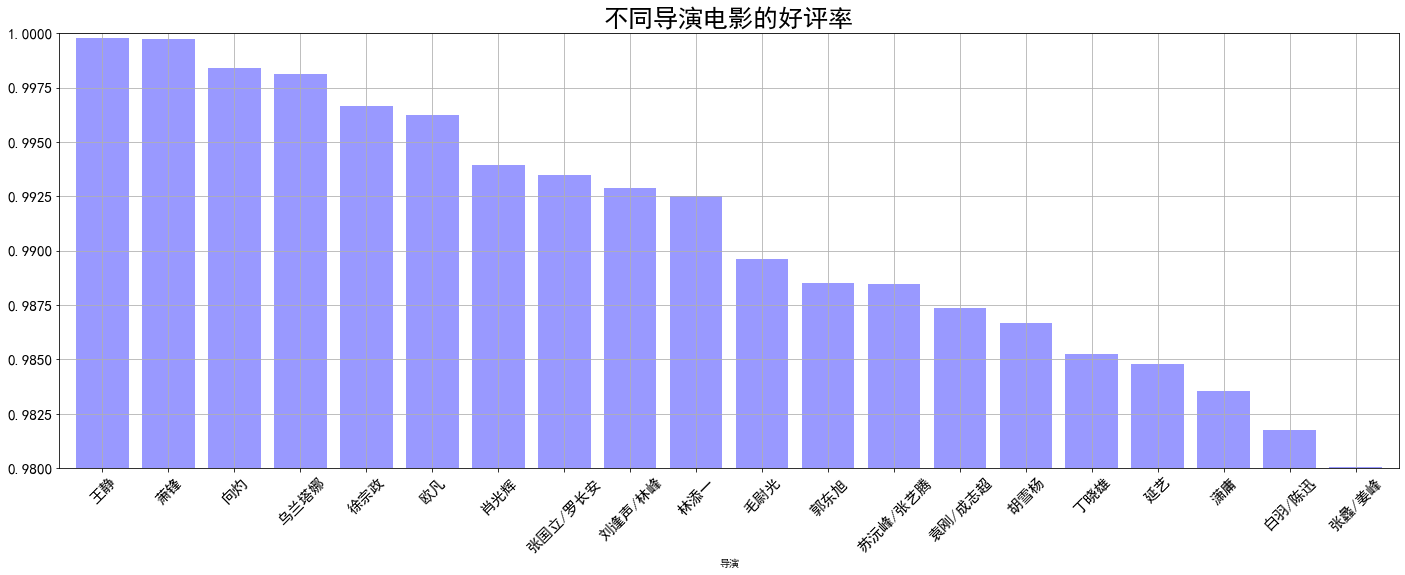

In [65]:
# 2.1分析出不同导演电影的好评率，并筛选出TOP20 
# 2.2通过多系列柱状图，做图表可视化


df_q1 = data_c2.groupby('导演')[['好评数','评分人数']].sum()
print(df_q1.head())
print('-------------')
df_q1['好评率'] = df_q1['好评数'] / df_q1['评分人数']
print(df_q1.head())
print('-------------')
result_q1 = df_q1.sort_values(['好评率'], ascending=False)[:20]  # ascending=False降序
print(result_q1)
print('-------------')
# 计算统计不同导演的好评率

fig = result_q1['好评率'].plot(kind='bar',
       color = 'b',
       width = 0.8,
       alpha = 0.4,
       rot = 45,
       grid = True,
       ylim = [0.98,1],  # y坐标不能以0开始，否则各数据的柱状图区分度不高
       figsize = (24,8),
       title = '不同导演电影的好评率')
fig.axes.title.set_size(25)
plt.tick_params(labelsize=15)

     导演    上映年份     整理后剧名
0  缺失数据  2004.0       斗鱼2
1  缺失数据  2008.0    江湖兄弟全集
2  缺失数据  2005.0  肥猫寻亲记2全集
3  缺失数据  2006.0    舞台姐妹全集
4  缺失数据  2007.0   18禁不禁全集
-------------
                      评分人数        好评数
整理后剧名                                
101网校高考历史冲刺考点解析       90.0       78.0
10品官吴山羊            57715.0    38736.0
10大奇冤            3002099.0  2801151.0
10天10夜             18209.0    11299.0
10指连心              14852.0    10617.0
-------------
     导演    上映年份     整理后剧名        评分人数         好评数
0  缺失数据  2004.0       斗鱼2   1488378.0   1398674.0
1  缺失数据  2008.0    江湖兄弟全集   1809908.0   1477701.0
2  缺失数据  2005.0  肥猫寻亲记2全集    461860.0    407507.0
3  缺失数据  2006.0    舞台姐妹全集    120525.0     99885.0
4  缺失数据  2007.0   18禁不禁全集  34402833.0  31482452.0
-------------
               评分人数          好评数
上映年份                            
2001.0   22445120.0   18824233.0
2002.0  113159045.0  101446919.0
2003.0  197567756.0  183256290.0
2004.0  324745434.0  309402662.0
2005.0  123950548.0  111470104.0
-----

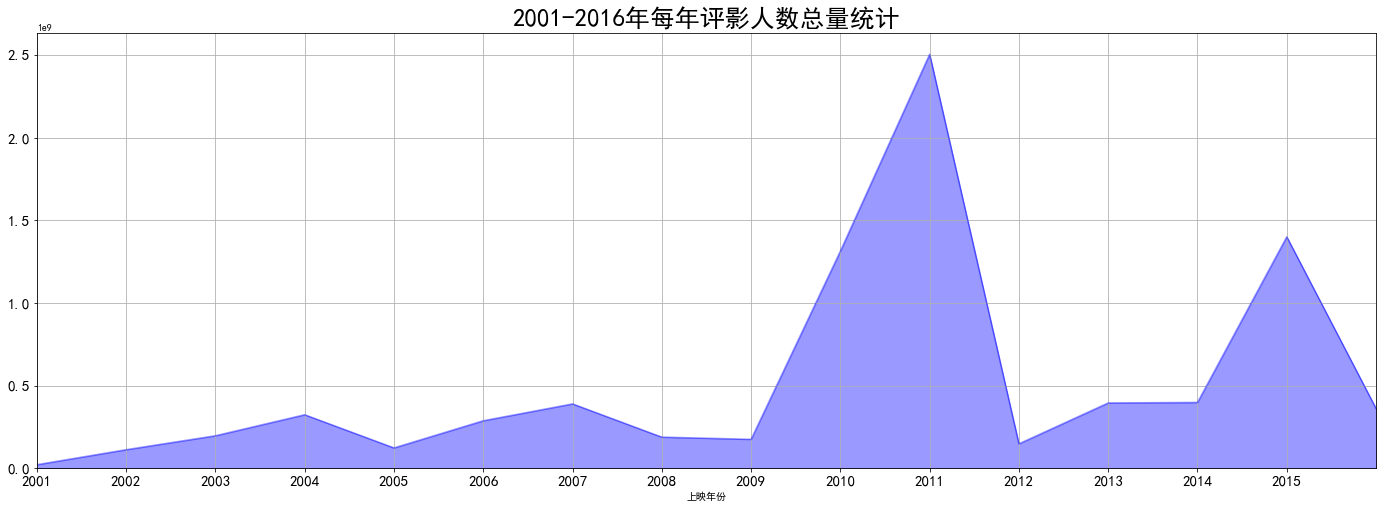

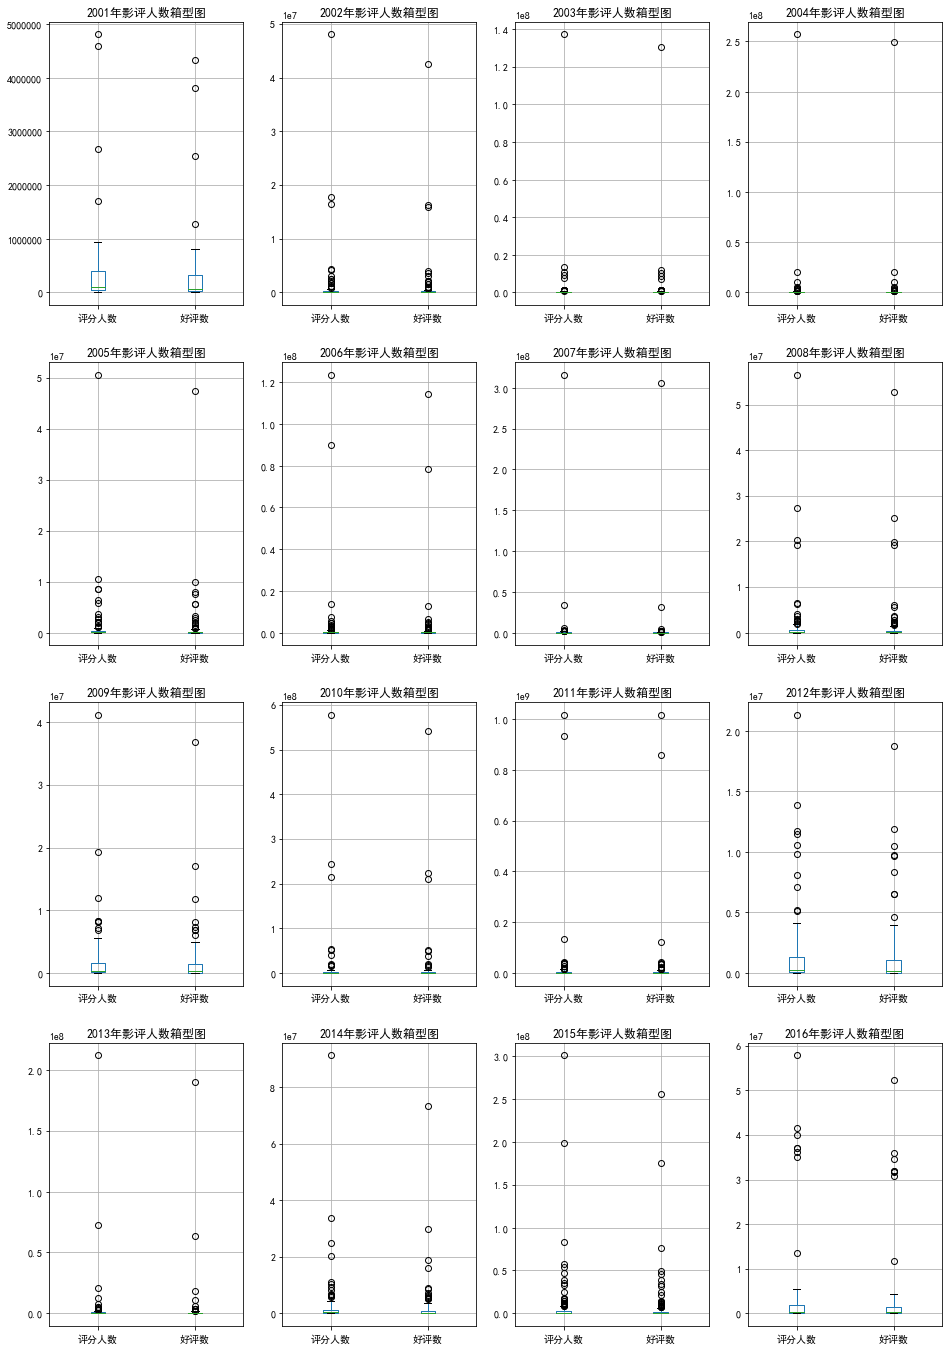

In [96]:
# 问题2 统计分析2001-2016年每年评影人数总量
# 要求：
# ① 计算统计出2001-2016年每年评影人数总量，不要求创建函数
# ② 通过面积图，做图表可视化，分析每年人数总量变化规律
# ③ 验证是否有异常值（极度异常）
# ④ 创建函数分析出数据外限最大最小值）
# ⑤ 筛选查看异常值 → 是否异常值就是每年的热门电影？
# 提示：
# ① 通过箱型图验证异常值情况
# ② 通过quantile(q=0.5)方法，得到四分位数
# ③ IQR=Q3-Q1
# ④ 外限：最大值区间Q3+3IQR,最小值区间Q1-3IQR （IQR=Q3-Q1）

q2data1 = data_c2[['导演','上映年份','整理后剧名']].drop_duplicates()  # drop_duplicates去重
q2data1 = q2data1[q2data1['上映年份'] > 2000]  # 只要2001-2016年份的数据
print(q2data1.head())
print('-------------')

q2data2 = data_c2.groupby('整理后剧名').sum()[['评分人数','好评数']]
print(q2data2.head())
print('-------------')
# 求出不同剧的评分人数、好评数总和

q2data3 = pd.merge(q2data1,q2data2,left_on='整理后剧名',right_index=True)
print(q2data3.head())
print('-------------')
# 合并数据，得到不同年份，不同剧的评分人数、好评数总和

q2data4 = q2data3.groupby('上映年份').sum()[['评分人数','好评数']]
print(q2data4.head())
print('-------------')
q2data5 = data_c2[data_c2['上映年份'] > 2000].groupby('上映年份').sum()[['评分人数','好评数']]
print(q2data5.head())
print('-------------')
# 按照电影上映年份统计，评分人数量
# 每年影评人数通过每个电影来判断是否合理？存在同一个人评价多个电影的情况

fig1 = plt.figure(num=1,figsize=(12,4))
fig2 = q2data4['评分人数'].loc[2000:].plot.area(figsize = (24,8),
                                    grid = True,
                                    color = 'b',
                                    alpha = 0.4)
plt.xticks(range(2001,2016))
plt.title('2001-2016年每年评影人数总量统计')
fig2.axes.title.set_size(25)
plt.tick_params(labelsize=15)

# 创建面积图
# 存在异常值，哪些是异常值？

fig,axes = plt.subplots(4,4,figsize=(16,24))
start = 2001
for i in range(4):
    for j in range(4):
        data = q2data3[q2data3['上映年份'] == start]
        data[['评分人数','好评数']].boxplot(whis = 3,  # IQR为3
                                            # return_type='dict',
                                            ax = axes[i,j]).set_title('%i年影评人数箱型图'%start)  # 创建矩阵箱型图
        start += 1
# 发现基本每年的数据中都有异常值，且为极度异常

In [97]:
# 创建函数得到外限最大最小值
# 查看异常值

a = q2data3[q2data3['上映年份'] == 2001]
def data_error(df,col):
    q1 = df[col].quantile(q=0.25)  # 上四分位数
    q3 = df[col].quantile(q=0.75)  # 下四分位数
    iqr = q3 - q1   # IQR
    tmax = q3 + 3 * iqr  # 外限最大值
    tmin = q3 - 3 * iqr  # 外限最小值
    return(tmax,tmin)
# 创建函数，得到外限最大最小值

for i in range(2000,2016):
    datayear = q2data3[q2data3['上映年份'] == i]  # 筛选该年度的数据
    print('%i年有%i条数据' % (i,len(datayear)))  # 查看每年的数据量
    t = data_error(datayear,'评分人数')  # 得到外限最大最小值
    #print(t)
    print(datayear[datayear['评分人数'] > t[0]])  # 查看评分人数大于外限最大值的异常值
    print('-------\n')
# 查看异常值信息

2000年有0条数据
Empty DataFrame
Columns: [导演, 上映年份, 整理后剧名, 评分人数, 好评数]
Index: []
-------

2001年有49条数据
           导演    上映年份   整理后剧名       评分人数        好评数
1027       英达  2001.0   东北1家人  2674339.0  2550233.0
1338      王冀邢  2001.0      黑冰  1703364.0  1278592.0
1863      胡明凯  2001.0  少年包青天2  4809919.0  4335522.0
1972  陈家林、刘大印  2001.0    康熙王朝  4589462.0  3811875.0
-------

2002年有76条数据
          导演    上映年份       整理后剧名        评分人数         好评数
69       赵宝刚  2002.0  拿什么拯救你我的爱人   2184294.0   1954774.0
179      王文杰  2002.0         大染坊   1213903.0    943441.0
542      高力强  2002.0       乌龙闯情关  17787335.0  16282770.0
560      胡雪杨  2002.0        白领公寓   1056247.0   1042170.0
670      梁德龙  2002.0       少年张3丰  48030057.0  42450999.0
705      刘家成  2002.0    铁齿铜牙纪晓岚2   4116280.0   3598471.0
711      张国立  2002.0    康熙微服私访记4   2430093.0   2139569.0
978       欧凡  2002.0      我的淘气天使   3100421.0   3088701.0
1026      英达  2002.0     东北1家人续集    832767.0    783944.0
1118     王重光  2002.0         半生缘   1788765.0   159311